<a href="https://colab.research.google.com/github/Pala63/USO-IA-ESCUELAS-GRUPO5/blob/main/notebooks/.gitkeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ai_assistant_usage_student_life.csv to ai_assistant_usage_student_life (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('ai_assistant_usage_student_life.csv')
print(df.head())  # Muestra las primeras filas
print("="*50)
print(df.info())
print("="*50)
print(df.describe())
print("="*50)
print(df.isnull().sum())
print("="*50)
df.dropna(inplace=True)
print("="*50)
print(df['AI_AssistanceLevel'].value_counts())
print("="*50)
df['AI_AssistanceLevel'] = df['AI_AssistanceLevel'].astype('category')


      SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   
3  SESSION00004  Undergraduate  Computer Science  2025-05-06   
4  SESSION00005  Undergraduate        Psychology  2025-03-18   

   SessionLengthMin  TotalPrompts  TaskType  AI_AssistanceLevel  \
0             31.20            11  Studying                   2   
1             13.09             6  Studying                   3   
2             19.22             5    Coding                   3   
3              3.70             1    Coding                   3   
4             28.12             9   Writing                   3   

           FinalOutcome  UsedAgain  SatisfactionRating  
0  Assignment Completed       True                 1.0  
1  Assignment Completed       True                 2.0  
2  Assignment Completed       True       

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Mostrar primeras filas
df.head()



,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [11]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   SessionID           10000 non-null  object  
 1   StudentLevel        10000 non-null  object  
 2   Discipline          10000 non-null  object  
 3   SessionDate         10000 non-null  object  
 4   SessionLengthMin    10000 non-null  float64 
 5   TotalPrompts        10000 non-null  int64   
 6   TaskType            10000 non-null  object  
 7   AI_AssistanceLevel  10000 non-null  category
 8   FinalOutcome        10000 non-null  object  
 9   UsedAgain           10000 non-null  bool    
 10  SatisfactionRating  10000 non-null  float64 
dtypes: bool(1), category(1), float64(2), int64(1), object(6)
memory usage: 723.0+ KB


,0
SessionID,0
StudentLevel,0
Discipline,0
SessionDate,0
SessionLengthMin,0
TotalPrompts,0
TaskType,0
AI_AssistanceLevel,0
FinalOutcome,0
UsedAgain,0


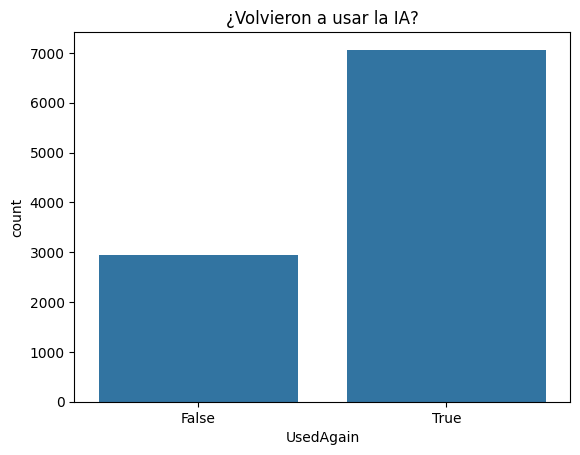

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='UsedAgain', data=df)
plt.title("¿Volvieron a usar la IA?")
plt.show()


In [13]:
import pandas as pd

# Conteo total por carrera
df['Discipline'].value_counts()


,count
Discipline,
Biology,1458
Computer Science,1445
Engineering,1430
Math,1422
Psychology,1418
History,1417
Business,1410


#  **¿Qué carrera o disciplina usa más la IA, y por qué podría ser?**

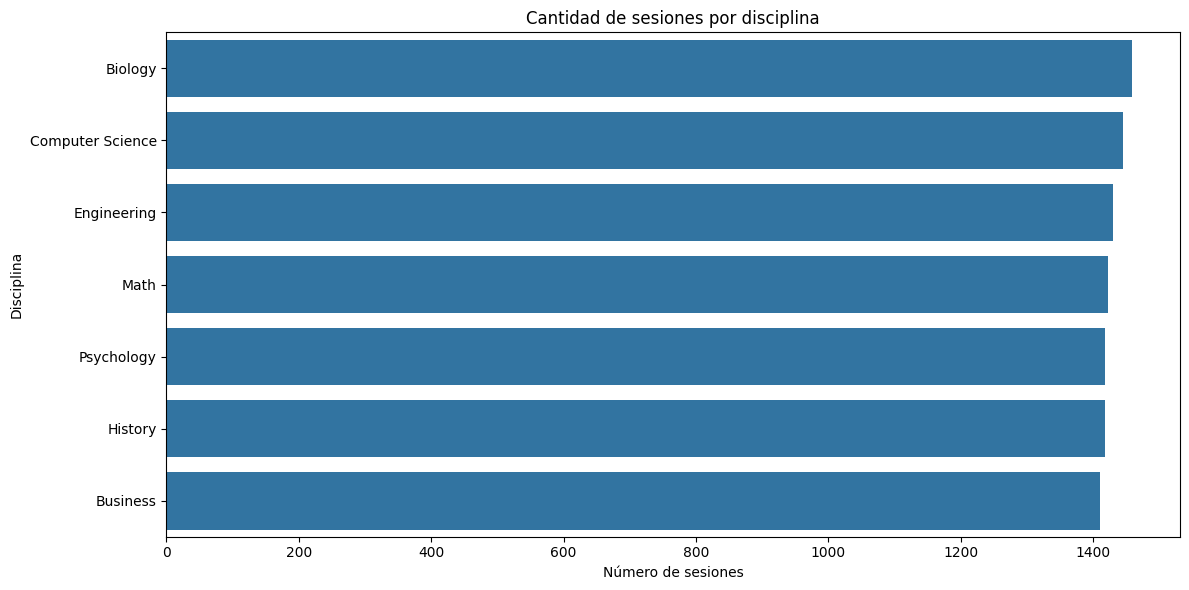

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Discipline', order=df['Discipline'].value_counts().index)
plt.title('Cantidad de sesiones por disciplina')
plt.xlabel('Número de sesiones')
plt.ylabel('Disciplina')
plt.tight_layout()
plt.show()


**La disciplina con mas número de sesiones usando la IA es Bilogía, ya que esta carrera requiere más tareas escritas o de investigación es congruente que muestre estos resultados.**

---



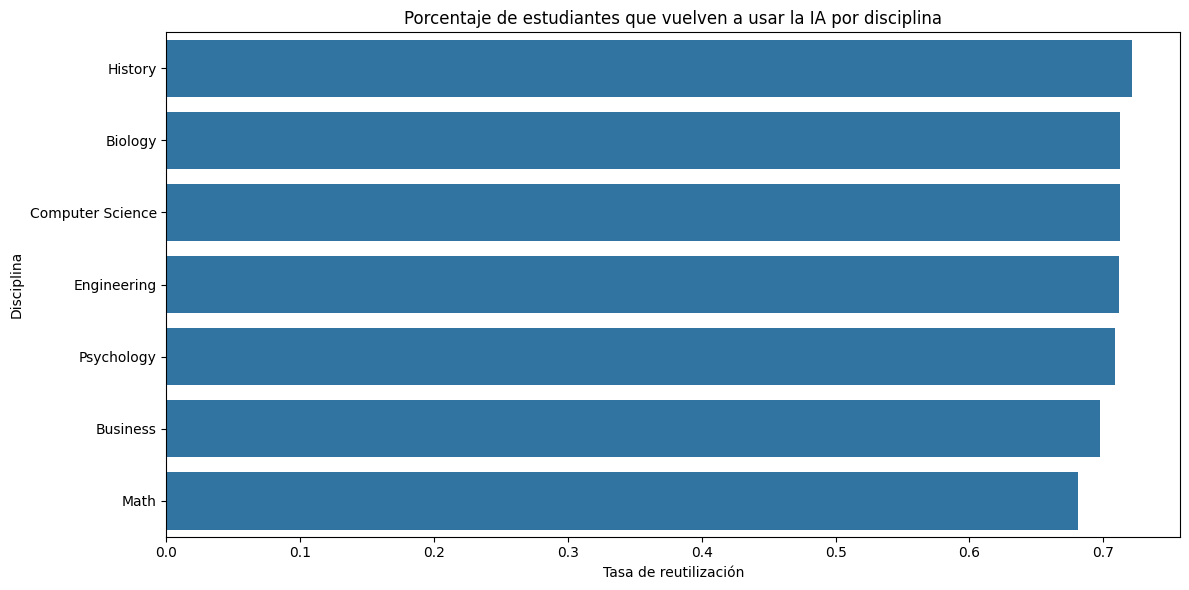

In [15]:
# Porcentaje de sesiones con "UsedAgain = True" por disciplina
used_again_rate = df.groupby('Discipline')['UsedAgain'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=used_again_rate.values, y=used_again_rate.index)
plt.title('Porcentaje de estudiantes que vuelven a usar la IA por disciplina')
plt.xlabel('Tasa de reutilización')
plt.ylabel('Disciplina')
plt.tight_layout()
plt.show()


**Quienes vuelven a usar la IA en repetidas ocasiones es Historia de ahi le siguen carreras como biología,etc.**

In [19]:
df[df['Discipline'] == 'Biology']['TaskType'].value_counts(normalize=True)


,proportion
TaskType,
Writing,0.298354
Studying,0.213992
Coding,0.207133
Homework Help,0.206447
Brainstorming,0.041838
Research,0.032236


**El tipo de tarea que mas hacen los estudiantes de Biología es Writing esto se relaciona con trabajos de investigación y redacción y puede ser uno de las razones de por que es la carrera con mas uso de la IA.**

In [20]:
df[df['Discipline'] == 'Biology']['AI_AssistanceLevel'].value_counts(normalize=True)


,proportion
AI_AssistanceLevel,
4,0.357339
3,0.316187
5,0.161866
2,0.141289
1,0.023320


In [21]:
# Asegurarse de que sea tipo numérico (por si es 'category' u 'object')
df['AI_AssistanceLevel'] = pd.to_numeric(df['AI_AssistanceLevel'], errors='coerce')

# Filtrar por Biología y calcular el promedio
promedio_asistencia_biologia = df[df['Discipline'] == 'Biology']['AI_AssistanceLevel'].mean()

print(f"Promedio de nivel de asistencia de IA en Biología: {promedio_asistencia_biologia:.2f}")


Promedio de nivel de asistencia de IA en Biología: 3.49


In [22]:
df[df['Discipline'] == 'Biology']['StudentLevel'].value_counts(normalize=True)


,proportion
StudentLevel,
Undergraduate,0.594650
High School,0.206447
Graduate,0.198903


In [32]:
df[df['Discipline'] == 'History']['StudentLevel'].value_counts(normalize=True)


,proportion
StudentLevel,
Undergraduate,0.591390
High School,0.208892
Graduate,0.199718


**Según el análisis del dataset, observamos que los estudiantes de nivel Undergraduate representan el 59.46% de las sesiones con asistencia de IA, muy por encima de los estudiantes de High School (20.64%) y Graduate (19.89%). Esto indica que los estudiantes que recién están comenzando sus estudios universitarios son quienes más utilizan la inteligencia artificial como herramienta de apoyo para aprender.**

**¿Por qué Historia tiene mayor tasa de reutilización?**

In [25]:
# Agrupar por disciplina y calcular el promedio de satisfacción
df.groupby('Discipline')['SatisfactionRating'].mean().sort_values(ascending=False)


,SatisfactionRating
Discipline,
Biology,3.450000
History,3.438038
Psychology,3.432017
Math,3.419058
Computer Science,3.416263
Business,3.387943
Engineering,3.380420


**Podemos ver que historia tiene la segunda tasa mas alta de satisfacción haciendo uso de la IA. Esto nos señala que puede tener una alta probabilidad de fidelización.**

In [27]:
df[df['Discipline'] == 'History'][['TaskType', 'FinalOutcome']].value_counts(normalize=True)


TaskType       FinalOutcome        
Writing        Assignment Completed    0.151023
               Idea Drafted            0.118560
Coding         Assignment Completed    0.112915
Homework Help  Assignment Completed    0.100212
Studying       Assignment Completed    0.074100
               Idea Drafted            0.060692
Coding         Idea Drafted            0.043049
Homework Help  Idea Drafted            0.042343
               Confused                0.040226
Studying       Confused                0.035286
Writing        Confused                0.031052
Coding         Confused                0.029640
Brainstorming  Idea Drafted            0.022583
Studying       Gave Up                 0.020466
Research       Assignment Completed    0.017643
               Idea Drafted            0.016231
Homework Help  Gave Up                 0.015526
Research       Confused                0.014114
Writing        Gave Up                 0.012703
Brainstorming  Confused                0.010586
Coding         Gave Up                 0.010586
Research       Gave Up                 0.010586
Brainstorming  Assignment Completed    0.007763
               Gave Up                 0.002117
Name: proportion, dtype: float64

In [28]:
df[df['Discipline'] == 'History']['SessionLengthMin'].mean()


np.float64(19.76281580804517)

In [29]:
df[df['Discipline'] == 'Biology']['SessionLengthMin'].mean()

np.float64(19.944958847736626)

In [30]:
# Agrupar por disciplina y calcular el promedio de satisfacción
df.groupby('Discipline')['SatisfactionRating'].mean().sort_values(ascending=False)


,SatisfactionRating
Discipline,
Biology,3.450000
History,3.438038
Psychology,3.432017
Math,3.419058
Computer Science,3.416263
Business,3.387943
Engineering,3.380420


In [26]:
# Agrupar por disciplina y calcular el % de estudiantes que repitieron el uso de la IA
df.groupby('Discipline')['UsedAgain'].mean().sort_values(ascending=False)


,UsedAgain
Discipline,
History,0.721242
Biology,0.712620
Computer Science,0.712111
Engineering,0.711888
Psychology,0.708745
Business,0.697163
Math,0.680731


In [31]:
df['Discipline'].value_counts()


,count
Discipline,
Biology,1458
Computer Science,1445
Engineering,1430
Math,1422
Psychology,1418
History,1417
Business,1410


In [35]:
import pandas as pd
import plotly.graph_objects as go

# Datos
data = {
    'Discipline': ['Biology', 'Computer Science', 'Engineering', 'Math', 'Psychology', 'History', 'Business'],
    'Sessions': [1458, 1445, 1430, 1422, 1418, 1417, 1410],
    'UsedAgain': [0.712620, 0.712111, 0.711888, 0.680731, 0.708745, 0.721242, 0.697163],
    'SatisfactionRating': [3.45, 3.416263, 3.380420, 3.419058, 3.432017, 3.438038, 3.387943]
}

df = pd.DataFrame(data)
df = df.sort_values('Sessions', ascending=False)

# Crear figura
fig = go.Figure()

# Barras de sesiones
fig.add_trace(go.Bar(
    x=df['Discipline'],
    y=df['Sessions'],
    name='Sesiones Totales',
    marker_color='skyblue',
    yaxis='y1'
))

# Línea de UsedAgain
fig.add_trace(go.Scatter(
    x=df['Discipline'],
    y=df['UsedAgain'],
    name='UsedAgain (%)',
    mode='lines+markers',
    marker=dict(symbol='circle', color='green'),
    yaxis='y2'
))

# Línea de Satisfacción
fig.add_trace(go.Scatter(
    x=df['Discipline'],
    y=df['SatisfactionRating'],
    name='Satisfacción',
    mode='lines+markers',
    marker=dict(symbol='square', color='orange'),
    yaxis='y2'
))

# Layout
fig.update_layout(
    #title='Comparación por Disciplina: Sesiones, Satisfacción y Fidelización (UsedAgain)',
    xaxis=dict(title='Disciplina'),
    yaxis=dict(title='Sesiones Totales', side='left', showgrid=False),
    yaxis2=dict(title='UsedAgain / Satisfacción', overlaying='y', side='right'),
    legend=dict(x=0.01, y=1.15, orientation='h'),
    width=1000,
    height=500,
    margin=dict(l=60, r=60, t=80, b=40)
)

fig.show()


****

#**CONCLUSIONES**

**Las carreras centradas en la escritura y el análisis textual muestran una mayor adopción y reutilización, mientras que las disciplinas técnicas lo utilizan como una herramienta complementaria.**

**📌 Conclusiones Finales**
La visualización muestra tres aspectos clave por disciplina académica:
🔹 El total de sesiones donde se utilizó IA (barras azules)
🔹 El porcentaje de estudiantes que volverían a usarla (UsedAgain, línea verde)
🔹 El nivel de satisfacción promedio con la experiencia (línea naranja)

**🔍 ¿Cómo llegamos a estos insights?**
Recuento de sesiones por disciplina:
Usamos value_counts() y groupby() para identificar que Biología es la carrera con más sesiones, seguida muy de cerca por Computer Science y Engineering.

**Porcentaje de fidelización (UsedAgain):**
Calculamos el promedio de la columna UsedAgain para cada disciplina usando .groupby('Discipline')['UsedAgain'].mean().
Encontramos que Historia tiene el mayor porcentaje de estudiantes que volverían a usar IA (72.1%), lo que indica un alto valor percibido.

**Satisfacción promedio:**
Usamos .groupby('Discipline')['SatisfactionRating'].mean() para medir qué tan contentos estaban los estudiantes con su experiencia.
Aunque Biología lidera en número de sesiones, Historia le sigue muy de cerca en satisfacción, reforzando su fidelización.

**🧠 ¿Qué entendemos con esto?**
Cantidad no es calidad: Aunque Biología tiene más sesiones, Historia logra que sus usuarios regresen más. Esto sugiere que el tipo de tareas o la forma en que usan IA en Historia es más efectiva o gratificante.

**Perfil del usuario influye:** Biología tiene mayor uso posiblemente porque es común en los primeros niveles educativos, donde los estudiantes están más abiertos a experimentar con nuevas tecnologías como la IA.

Satisfacción y fidelización están relacionadas, pero no son lo mismo: La alta satisfacción en varias disciplinas no siempre se traduce en más uso futuro. Esto muestra que hay más factores en juego, como la utilidad práctica o el contexto de uso.